In [1]:
!pip install keras
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
     ------------------------------------ 266.3/266.3 MB 587.8 kB/s eta 0:00:00
     ------------------------------------ 895.9/895.9 kB 821.6 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 506.8 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 785.4 kB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 524.5 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 922.1 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 587.7 kB/s eta 0:00:00
     ------------------------------------ 177.0/177.0 kB 8

Epoch 1/20
106/106 - 6s - loss: 2.7055 - accuracy: 0.6632 - val_loss: 0.6782 - val_accuracy: 0.8217 - 6s/epoch - 60ms/step
Epoch 2/20
106/106 - 2s - loss: 0.5326 - accuracy: 0.8522 - val_loss: 0.4519 - val_accuracy: 0.8800 - 2s/epoch - 23ms/step
Epoch 3/20
106/106 - 2s - loss: 0.3693 - accuracy: 0.8964 - val_loss: 0.3635 - val_accuracy: 0.9017 - 2s/epoch - 20ms/step
Epoch 4/20
106/106 - 2s - loss: 0.2894 - accuracy: 0.9174 - val_loss: 0.3093 - val_accuracy: 0.9148 - 2s/epoch - 21ms/step
Epoch 5/20
106/106 - 2s - loss: 0.2363 - accuracy: 0.9304 - val_loss: 0.2896 - val_accuracy: 0.9185 - 2s/epoch - 20ms/step
Epoch 6/20
106/106 - 2s - loss: 0.1991 - accuracy: 0.9408 - val_loss: 0.2575 - val_accuracy: 0.9308 - 2s/epoch - 20ms/step
Epoch 7/20
106/106 - 2s - loss: 0.1695 - accuracy: 0.9491 - val_loss: 0.2444 - val_accuracy: 0.9350 - 2s/epoch - 23ms/step
Epoch 8/20
106/106 - 3s - loss: 0.1449 - accuracy: 0.9554 - val_loss: 0.2305 - val_accuracy: 0.9402 - 3s/epoch - 25ms/step
Epoch 9/20
106/1

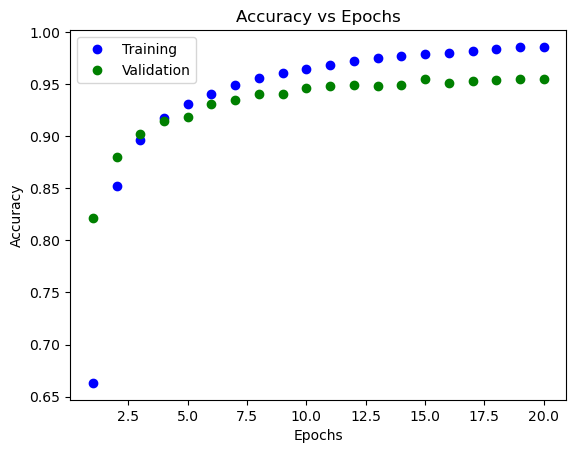

In [4]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

# suppress warning/error messages in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# load in data from mnist dataset (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# split main training set into train/validation sets (6k out of 60k data points reserved for validation)
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]

'''
Building layers for the feedforward NN:
Hidden layers have 56, 96, 96, and 56 nodes, in that order.
Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).
'''
model = models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
			  optimizer='adam',
			  metrics=['accuracy'])

# training the NN
epochs = 20
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")

# plotting learning curves during training (on both training and validation data)
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()